In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#importing dataset
resumeDataSet = pd.read_csv('/content/drive/MyDrive/Resume.csv', encoding = 'utf-8')
resumeDataSet.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
#removing unecessary columns and changng column name
resumeDataSet=resumeDataSet.rename(columns = {'Resume_str':'Resume'})
resumeDataSet = resumeDataSet.drop(['ID', 'Resume_html'], axis=1)
resumeDataSet.head()

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [ ]:
#to know the rows and columns
print(f"Rows : {resumeDataSet.shape[0]}")
print(f"Columns : {resumeDataSet.shape[1]}\n")

#List of all columns
print("List of Columns:")
for count,item in enumerate([column for column in resumeDataSet.columns]):
  print(f"{count+1}. {item}")

Rows : 2484
Columns : 2

List of Columns:
1. Resume
2. Category


In [ ]:
# description about the dataset
resumeDataSet.describe()

,Resume,Category
count,2484,2484
unique,2482,24
top,STOREKEEPER II Professional Sum...,INFORMATION-TECHNOLOGY
freq,2,120


In [ ]:
#information about the dataset
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    2484 non-null   object
 1   Category  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [ ]:
#Method for checking whether entire dataset contains any missing values - will return True if missing values are present
print(resumeDataSet.isnull().values.any(),end='\n\n')

#to know which column values are missing if missing values are there - it will return true for the columns where missing values are present
print(resumeDataSet.isnull().any(),end='\n\n')

#to know how many values are missing in a particular column
print(resumeDataSet.isnull().sum(),end='\n\n')

#Gives particular column which has missing values
[feature for feature in resumeDataSet.columns if resumeDataSet[feature].isnull().sum()>0]

False

Resume      False
Category    False
dtype: bool

Resume      0
Category    0
dtype: int64



[]

In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64


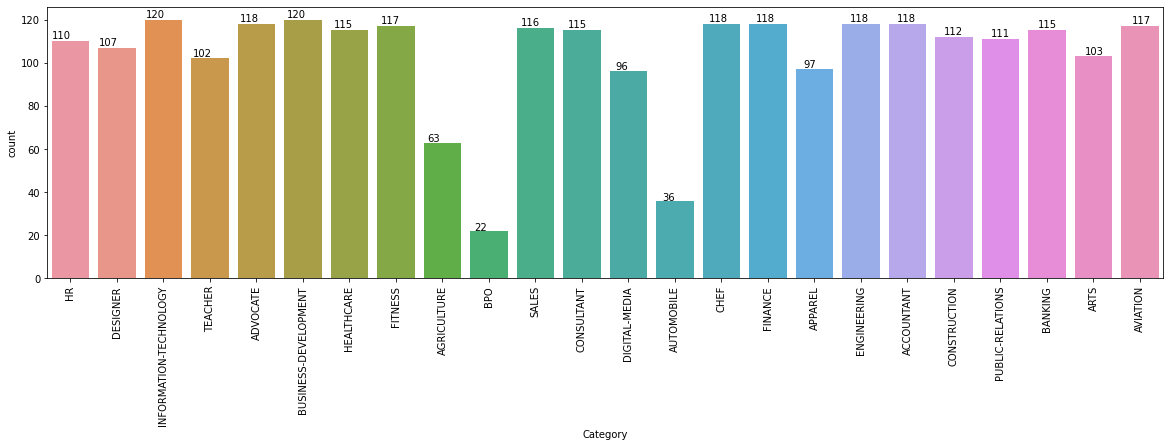

In [ ]:
# visualizing resume list in different categories
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

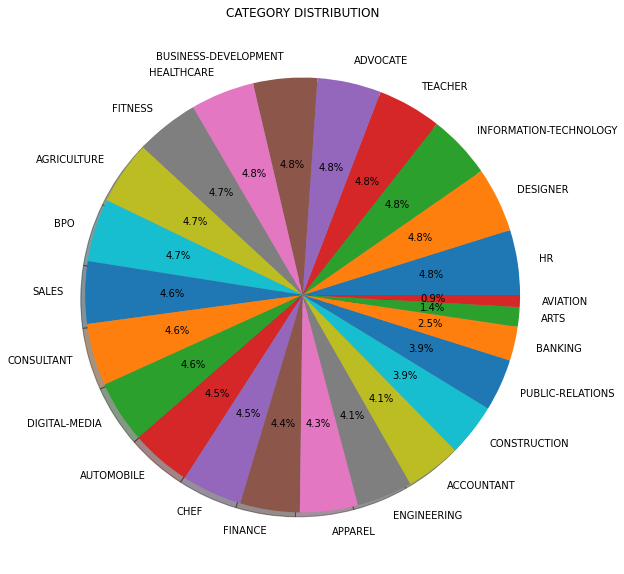

In [ ]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
# text cleaning
def cleanResume(resumeText):
    #resumeText = resumeText.lower()
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub(re.compile(r"\\[nrtabfv?\\]"), "", resumeText)  # removes escape characters
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
resumeDataSet.head()

,Resume,Category,cleaned_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,HR SPECIALIST US HR OPERATIONS Summary Versat...
2,HR DIRECTOR Summary Over 2...,HR,HR DIRECTOR Summary Over 20 years experience ...
3,HR SPECIALIST Summary Dedica...,HR,HR SPECIALIST Summary Dedicated Driven and Dy...
4,HR MANAGER Skill Highlights ...,HR,HR MANAGER Skill Highlights HR SKILLS HR Depa...


In [ ]:
# tokenization and removal of stop words
oneSetOfStopWords = set(['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', 'currently', 'd', 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he's", 'hello', 'help', 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'i', "i'd", "i'll", "i'm", "i've", 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', "t's", 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that's", 'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there's", 'thereafter', 'thereby', 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", "we'll", "we're", "we've", 'welcome', 'well', 'went', 'were', "weren't", 'what', "what's", 'whatever', 'when', 'whence', 'whenever', 'where', "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', "who's", 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', "won't", 'wonder', 'would', 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'z', 'zero']+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('State', 15351), ('City', 14960), ('Company', 11932), ('Name', 11653), ('A', 7200), ('management', 7011), ('customer', 6156), ('sales', 5645), ('Management', 5085), ('team', 4728), ('I', 4710), ('business', 4462), ('service', 4427), ('skills', 4188), ('including', 4003), ('development', 3845), ('training', 3798), ('work', 3514), ('Skills', 3491), ('staff', 3406), ('customers', 3356), ('Education', 3355), ('Manager', 3288), ('company', 3273), ('support', 3223), ('Business', 3183), ('University', 3157), ('financial', 3084), ('project', 3044), ('clients', 3014), ('Experience', 2876), ('data', 2867), ('reports', 2855), ('marketing', 2836), ('ounting', 2829), ('Microsoft', 2811), ('01', 2793), ('2014', 2792), ('ounts', 2769), ('process', 2733), ('experience', 2731), ('client', 2694), ('system', 2669), ('information', 2631), ('2013', 2554), ('quality', 2537), ('systems', 2477), ('Office', 2459), ('procedures', 2415), ('product', 2407)]


In [ ]:
resumeDataSet_copy = resumeDataSet.copy()

In [ ]:
#label encoding the categories
le = LabelEncoder()
resumeDataSet["Category"] = le.fit_transform(resumeDataSet["Category"])
resumeDataSet.head()

,Resume,Category,cleaned_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,19,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1,"HR SPECIALIST, US HR OPERATIONS ...",19,HR SPECIALIST US HR OPERATIONS Summary Versat...
2,HR DIRECTOR Summary Over 2...,19,HR DIRECTOR Summary Over 20 years experience ...
3,HR SPECIALIST Summary Dedica...,19,HR SPECIALIST Summary Dedicated Driven and Dy...
4,HR MANAGER Skill Highlights ...,19,HR MANAGER Skill Highlights HR SKILLS HR Depa...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

x_train,x_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(x_train.shape)
print(x_test.shape)

Feature completed .....
(1987, 39998)
(497, 39998)


MODEL TRAINING

In [ ]:
knn_clf = OneVsRestClassifier(KNeighborsClassifier())
knn_clf.fit(x_train, y_train)
prediction = knn_clf.predict(x_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(knn_clf.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(knn_clf.score(x_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.65
Accuracy of KNeighbors Classifier on test set:     0.50


In [ ]:
# for getting the labels
#resumeDataSet_copy.Category.value_counts().sort_index(ascending=True).index.to_list()

KNN Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.55      0.75      0.63        24
              ADVOCATE       0.33      0.25      0.29        24
           AGRICULTURE       1.00      0.23      0.38        13
               APPAREL       0.38      0.16      0.22        19
                  ARTS       0.55      0.29      0.37        21
            AUTOMOBILE       0.33      0.14      0.20         7
              AVIATION       1.00      0.38      0.55        24
               BANKING       0.77      0.43      0.56        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.27      0.62      0.38        24
                  CHEF       0.94      0.62      0.75        24
          CONSTRUCTION       0.80      0.73      0.76        22
            CONSULTANT       0.25      0.04      0.07        23
              DESIGNER       0.74      0.67      0.70        21
         DIG

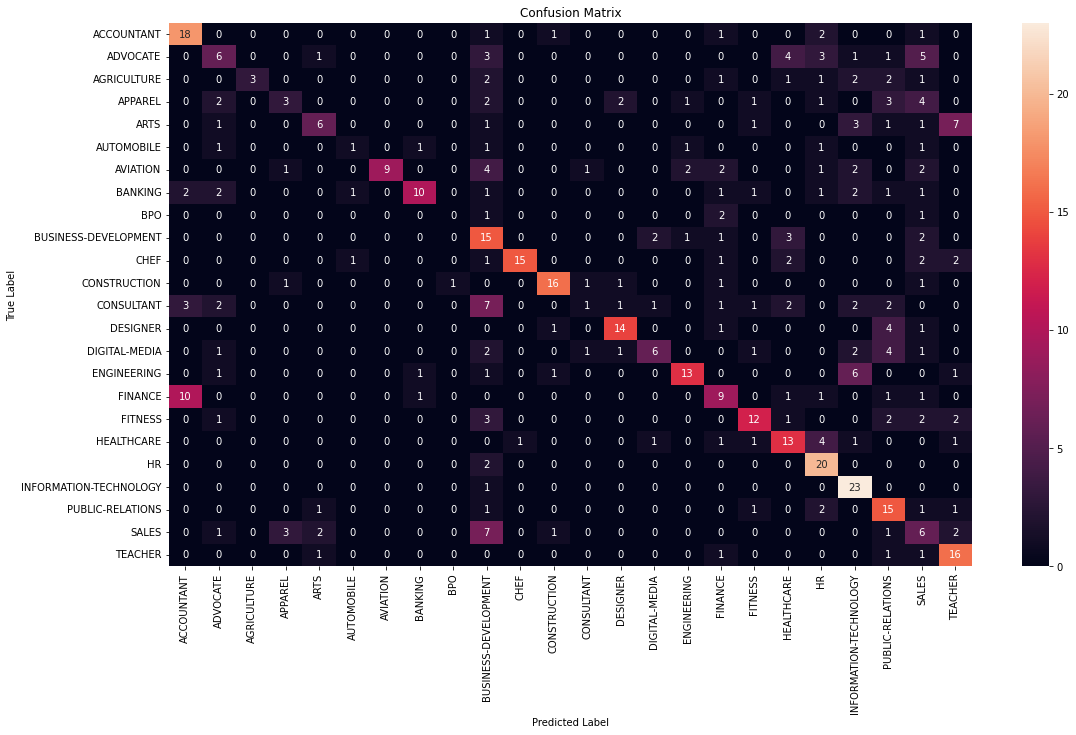

In [ ]:
# confusion matrix for the KNN
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have two lists: y_true (true labels) and y_pred (predicted labels)
y_pred = knn_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
labels = ['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']

print('KNN Classification Report:')
print(classification_report(y_test, y_pred, target_names=labels))

plt.subplots(figsize=(18,10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
svm_clf = OneVsRestClassifier(SVC())
svm_clf.fit(x_train, y_train)
prediction = svm_clf.predict(x_test)
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(svm_clf.score(x_train, y_train)))
print('Accuracy of SVM Classifier on test set:     {:.2f}'.format(svm_clf.score(x_test, y_test)))

Accuracy of SVM Classifier on training set: 1.00
Accuracy of SVM Classifier on test set:     0.62


SVM Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.55      0.92      0.69        24
              ADVOCATE       0.59      0.54      0.57        24
           AGRICULTURE       1.00      0.31      0.47        13
               APPAREL       0.50      0.21      0.30        19
                  ARTS       1.00      0.14      0.25        21
            AUTOMOBILE       1.00      0.29      0.44         7
              AVIATION       0.83      0.79      0.81        24
               BANKING       0.83      0.65      0.73        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.48      0.58      0.53        24
                  CHEF       0.77      0.83      0.80        24
          CONSTRUCTION       0.65      0.91      0.75        22
            CONSULTANT       0.50      0.04      0.08        23
              DESIGNER       0.77      0.81      0.79        21
         DIG

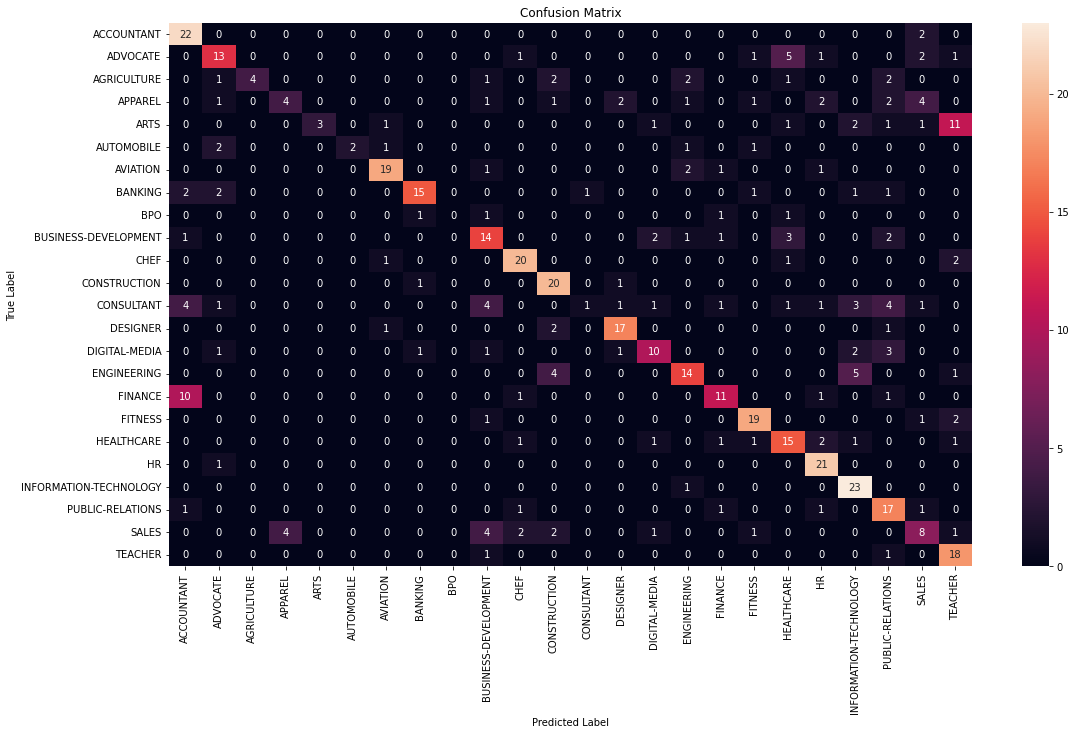

In [ ]:
# confusion matrix for the SVM
from sklearn.metrics import confusion_matrix

# Assuming you have two lists: y_true (true labels) and y_pred (predicted labels)
y_pred = svm_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
labels = ['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']

print('SVM Classification Report:')
print(classification_report(y_test, y_pred, target_names=labels))

plt.subplots(figsize=(18,10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
nb_clf = OneVsRestClassifier(MultinomialNB())
nb_clf.fit(x_train, y_train)
prediction = nb_clf.predict(x_test)
print('Accuracy of Naive Byes Classifier on training set: {:.2f}'.format(nb_clf.score(x_train, y_train)))
print('Accuracy of Naive Byes Classifier on test set:     {:.2f}'.format(nb_clf.score(x_test, y_test)))

Accuracy of Naive Byes Classifier on training set: 0.76
Accuracy of Naive Byes Classifier on test set:     0.52


Naive Bayes Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.42      0.88      0.57        24
              ADVOCATE       0.30      0.33      0.31        24
           AGRICULTURE       1.00      0.08      0.14        13
               APPAREL       1.00      0.05      0.10        19
                  ARTS       1.00      0.10      0.17        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.81      0.54      0.65        24
               BANKING       0.86      0.52      0.65        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.32      0.83      0.46        24
                  CHEF       0.73      0.79      0.76        24
          CONSTRUCTION       0.58      0.64      0.61        22
            CONSULTANT       0.00      0.00      0.00        23
              DESIGNER       0.71      0.48      0.57        21
    

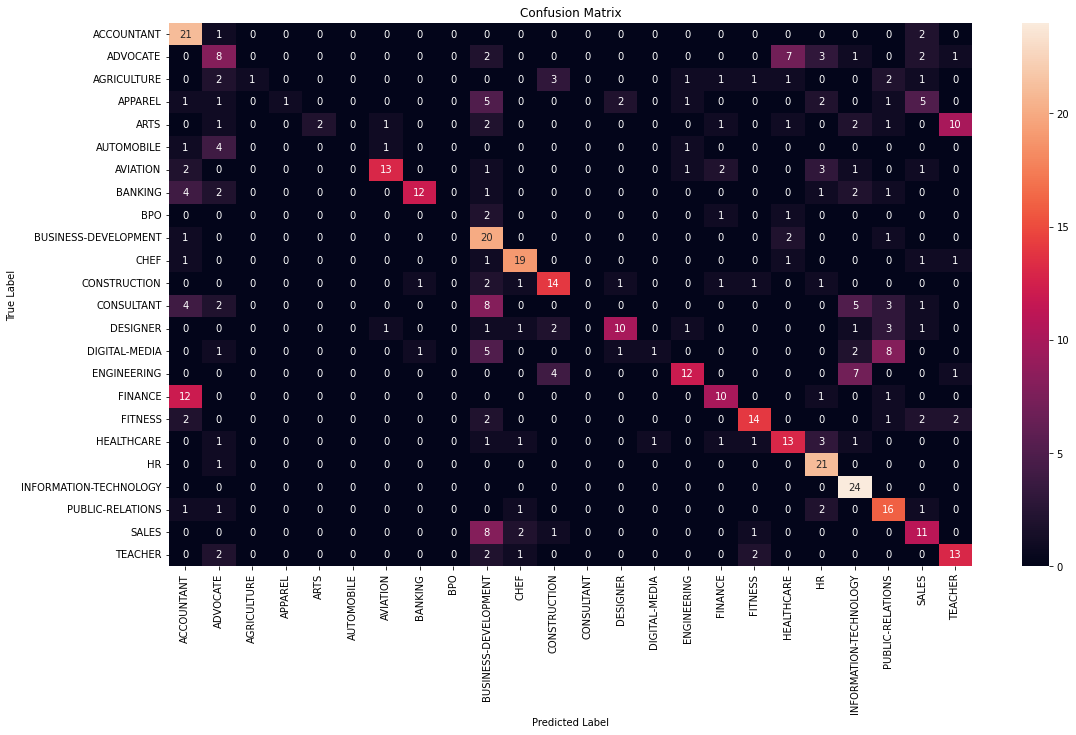

In [ ]:
# confusion matrix for the Naive Bayes
from sklearn.metrics import confusion_matrix

# Assuming you have two lists: y_true (true labels) and y_pred (predicted labels)
y_pred = nb_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
labels = ['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']

print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred, target_names=labels))

plt.subplots(figsize=(18,10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
dt_clf = OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy"))
dt_clf.fit(x_train, y_train)
prediction = dt_clf.predict(x_test)
print('Accuracy of Decision tree Classifier on training set: {:.2f}'.format(dt_clf.score(x_train, y_train)))
print('Accuracy of Decision tree Classifier on test set:     {:.2f}'.format(dt_clf.score(x_test, y_test)))

Accuracy of Decision tree Classifier on training set: 1.00
Accuracy of Decision tree Classifier on test set:     0.52


Decision Tree Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.62      0.77        24
              ADVOCATE       0.77      0.42      0.54        24
           AGRICULTURE       0.83      0.38      0.53        13
               APPAREL       0.46      0.32      0.37        19
                  ARTS       0.67      0.19      0.30        21
            AUTOMOBILE       1.00      0.43      0.60         7
              AVIATION       1.00      0.50      0.67        24
               BANKING       0.75      0.39      0.51        23
                   BPO       1.00      0.25      0.40         4
  BUSINESS-DEVELOPMENT       0.47      0.38      0.42        24
                  CHEF       0.88      0.62      0.73        24
          CONSTRUCTION       0.88      0.68      0.77        22
            CONSULTANT       0.73      0.35      0.47        23
              DESIGNER       0.76      0.76      0.76        21
  

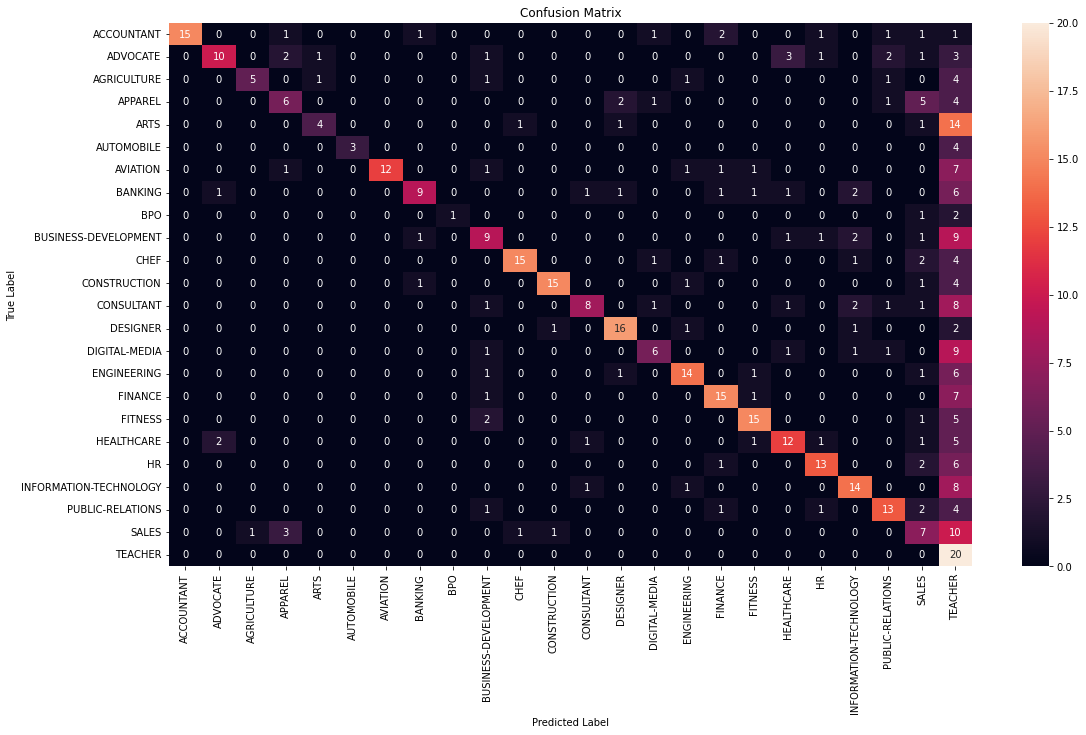

In [ ]:
# confusion matrix for the Decision Tree
from sklearn.metrics import confusion_matrix

# Assuming you have two lists: y_true (true labels) and y_pred (predicted labels)
y_pred = dt_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
labels = ['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']

print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred, target_names=labels))

plt.subplots(figsize=(18,10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
xgb_clf = OneVsRestClassifier(XGBClassifier())
xgb_clf.fit(x_train, y_train)
prediction = xgb_clf.predict(x_test)
print('Accuracy of XGB Classifier on training set: {:.2f}'.format(xgb_clf.score(x_train, y_train)))
print('Accuracy of XGB Classifier on test set:     {:.2f}'.format(xgb_clf.score(x_test, y_test)))

Accuracy of XGB Classifier on training set: 1.00
Accuracy of XGB Classifier on test set:     0.76


XGB Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.88      0.96      0.92        24
              ADVOCATE       0.74      0.83      0.78        24
           AGRICULTURE       1.00      0.62      0.76        13
               APPAREL       0.62      0.42      0.50        19
                  ARTS       0.61      0.52      0.56        21
            AUTOMOBILE       1.00      0.29      0.44         7
              AVIATION       0.91      0.83      0.87        24
               BANKING       0.81      0.57      0.67        23
                   BPO       0.67      1.00      0.80         4
  BUSINESS-DEVELOPMENT       0.59      0.71      0.64        24
                  CHEF       0.95      0.79      0.86        24
          CONSTRUCTION       0.83      0.91      0.87        22
            CONSULTANT       0.71      0.52      0.60        23
              DESIGNER       0.84      1.00      0.91        21
         DIG

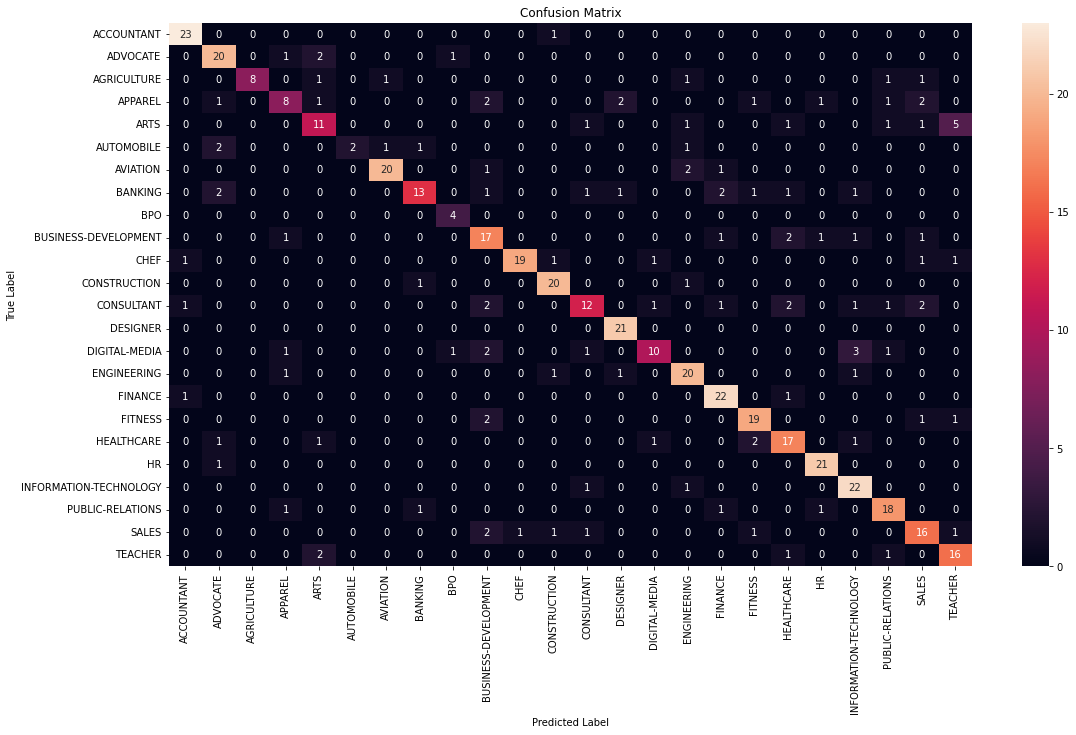

In [ ]:
# confusion matrix for the XGB
from sklearn.metrics import confusion_matrix

# Assuming you have two lists: y_true (true labels) and y_pred (predicted labels)
y_pred = xgb_clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
labels = ['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER']

print('XGB Classification Report:')
print(classification_report(y_test, y_pred, target_names=labels))

plt.subplots(figsize=(18,10))
sns.heatmap(cm, annot=True, fmt='g', xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
models = []
models.append(('SVM', OneVsRestClassifier(SVC())))
models.append(('NAIVE BAYES', OneVsRestClassifier(MultinomialNB())))
models.append(('KNN', OneVsRestClassifier(KNeighborsClassifier())))
models.append(('DECISION TREE', OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy"))))
models.append(('XGB', OneVsRestClassifier(XGBClassifier())))


from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=5, random_state=None)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


SVM: 0.611459 (0.033066)
NAIVE BAYES: 0.478074 (0.039582)
KNN: 0.489661 (0.044042)
DECISION TREE: 0.481118 (0.021714)
XGB: 0.741797 (0.030600)


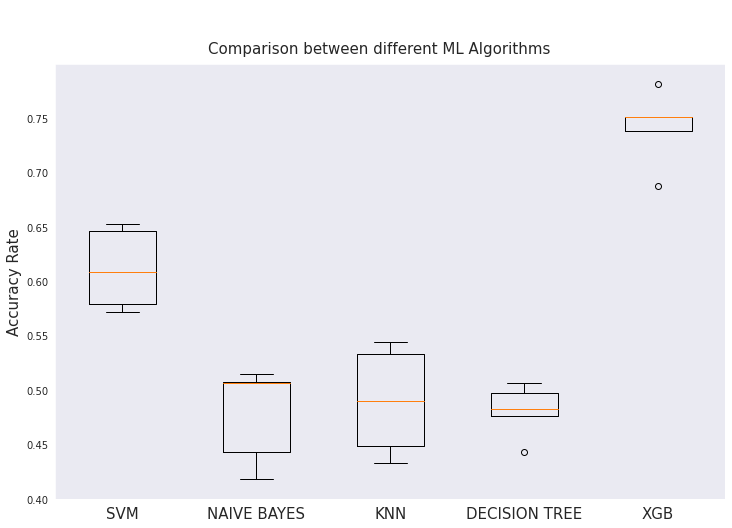

In [ ]:
# boxplot algorithm comparison
sns.set_style('dark')
fig = plt.figure(figsize=(12, 8))
fig.suptitle('\n\nComparison between different ML Algorithms', fontsize=15)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize=15)
plt.ylabel("Accuracy Rate", fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# assume you have y_true and y_pred as your true labels and predicted scores
# y_true is a 1D array of true labels, y_pred is a 2D array of predicted scores
n_classes = len(np.unique(y_true))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['red', 'green', 'blue'] # define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


NameError: ignored